## Author - Projapoti Roy
**Task 1 - Prediction using Supervised ML (Level - Beginner)**

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the dataset
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [3]:
#First 5 rows of dataset
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Last 5 rows of dataset
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
s_data.shape

(25, 2)

In [6]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Generate descriptive statistics
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage of scores')

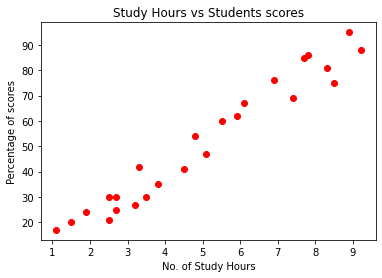

In [8]:
#Plot the distibution of scores
plt.scatter('Hours','Scores', data = s_data, color = 'red')  
plt.title('Study Hours vs Students scores')
plt.xlabel('No. of Study Hours')
plt.ylabel('Percentage of scores')

In [9]:
#Set input and target variables 
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [10]:
#Split the dataset into training & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

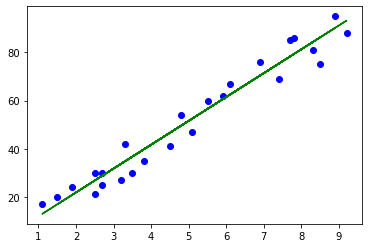

In [12]:
#Regression line
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'green')
plt.show()

In [13]:
#Coefficent of the regression line
regressor.coef_

array([9.91065648])

In [14]:
#Intercept of the regression line
regressor.intercept_

2.018160041434683

Text(0, 0.5, 'Percentage of scores')

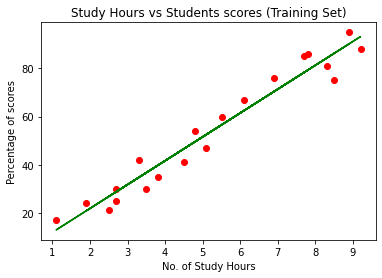

In [15]:
#Visualizing the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Study Hours vs Students scores (Training Set)')
plt.xlabel('No. of Study Hours')
plt.ylabel('Percentage of scores')

In [16]:
#Predicting the test set results
y_pred = regressor.predict(X_test)

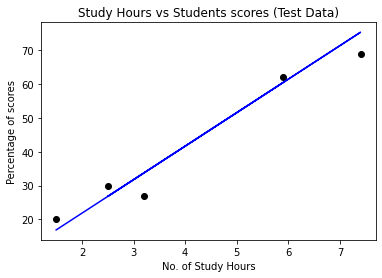

In [17]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Study Hours vs Students scores (Test Data)')
plt.xlabel('No. of Study Hours')
plt.ylabel('Percentage of scores')
plt.show()

In [18]:
#Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Predicted score if a student studies for 9.25 hrs/ day?
hrs = 9.25
test_val = (np.array(hrs)).reshape(1, -1)
scores = regressor.predict(test_val)
print("Predicted Score for No. of Scores " + str(hrs) + " is " + str(scores))

Predicted Score for No. of Scores 9.25 is [93.69173249]


In [20]:
#Evaluation Metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


**Conclusion**
1. There is a positive linear relation between the number of study hours and the percentage of score of a student.
2. The regression line is y = 9.91065648*X + 2.018160041434683.
2. Predicted score if a student studies for 9.25 hrs/ day is 93.69173249.